<a href="https://colab.research.google.com/github/erichsdb/Terminplaner/blob/master/notebooks/3-LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

The goal of this exercise is to implement the least mean squares algorithm (LMS) for linear regression seen in the course.

We start by importing numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Least mean squares

To generate the data for the exercise, we will use the `scikit-learn` library <https://scikit-learn.org>. It provides a huge selection of already implemented machine learning algorithms for classification, regression or clustering.

If you use Colab, `scikit-learn` should already be installed. Otherwise, install it with either `conda` or `pip` (you may need to restart this notebook afterwards):

```
conda install scikit-learn
# or:
pip install scikit-learn
```

We will use the method `sklearn.datasets.make_regression` to generate the data. The documentation of this method is available at <https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html>.

The following cell imports the method:

In [3]:
from sklearn.datasets import make_regression

We can now generate the data. We start with the simplest case where the inputs have only one dimension. We will generate 100 samples $(x_i, t_i)$ linked by a linear relationship and some noise.

The following code generates the data:

In [49]:
N = 100
X, t = make_regression(n_samples=N, n_features=1, noise=15.0)

`n_samples` is the number of samples generates, `n_features` is the number of input variables and `noise` quantifies how the points deviate from the linear relationship.

**Q:** Print the shape of the arrays `X` and `t` to better understand what is generated. Visualize the dataset using matplotlib (`plt.scatter`). Vary the value of the `noise` argument in the previous cell and visualize the data again.

X: (100, 1)
t: (100,)
100 100


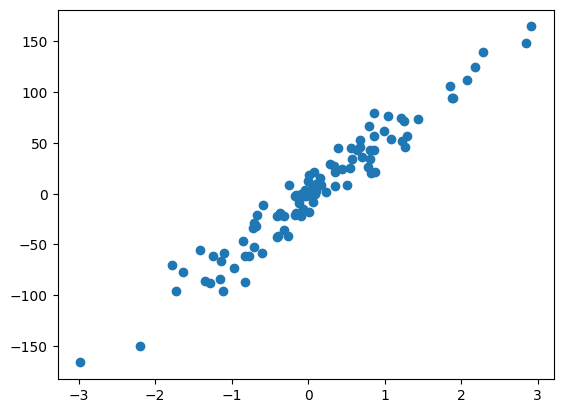

In [50]:
print(f'X: {X.shape}\nt: {t.shape}')
print(X.size, t.size)

plt.scatter(X,t)

Now is the time to implement the LMS algorithm with numpy.

Remember the LMS algorithm from the course:

* $w=0 \quad;\quad b=0$

* **for** M epochs:

    * $dw=0 \quad;\quad db=0$

    * **for** each sample $(x_i, t_i)$:

        * $y_i = w \, x_i + b$

        * $dw = dw + (t_i - y_i) \, x_i$

        * $db = db + (t_i - y_i)$

    * $\Delta w = \eta \, \frac{1}{N} dw$

    * $\Delta b = \eta \, \frac{1}{N} db$
    
Our linear model $y = w \, x + b$ predicts outputs for an input $x$. The error $t-y$ between the prediction and the data is used to adapt the weight $w$ and the bias $b$ at the end of each epoch.

**Q:** Implement the LMS algorithm and apply it to the generated data. The Python code that you will write is almost a line-by-line translation of the pseudo-code above. You will use a learning rate `eta = 0.1` at first, but you will vary this value later. Start by running a single epoch, as it will be easier to debug it, and then increase the number of epochs to 100. Print the value of the weight and bias at the end.

In [82]:
N_epochs = 100
eta = 0.1

w = 0
b = 0

for i in range(N_epochs):
  dw = 0
  db = 0
  for j in range(len(t)):
    y_i = w*X[j][0] + b
    dw = dw + (t[j]- y_i)*X[j][0]
    db = db + (t[j]- y_i)
  w = w + eta*1/N*dw
  b = b + eta*1/N*db
print(w)
print(b)


56.45011171767413
-2.119494368660031


**Q:** Visualize the quality of the fit by superposing the learned model to the data with matplotlib.

*Tip*: you can get the extreme values of the xaxis with `X.min()` and `X.max()`. To visualize the model, you just need to plot a line between the points `(X.min(), w*X.min()+b)` and `(X.max(), w*X.max()+b)`.

(-2.977510884610883, 2.915996513756782, -170.20031644553512, 162.4888346012586)


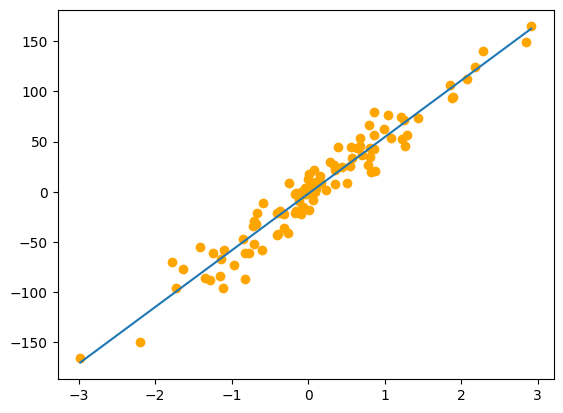

In [83]:
plt.plot([X.min(), X.max()], [w*X.min()+b, w*X.max()+b])
print((X.min(), X.max(), (w*X.min()+b), w*X.max()+b))
plt.scatter(X, t, c='orange')

Another option is to predict a value for all inputs and plot this vector $y$ against the desired values $t$.

**Q:** Make a scatter plot where $t$ is the x-axis and $y = w\, x + b$ is the y-axis. How should the points be arranged in the ideal case? Also plot what this ideal relationship should be.

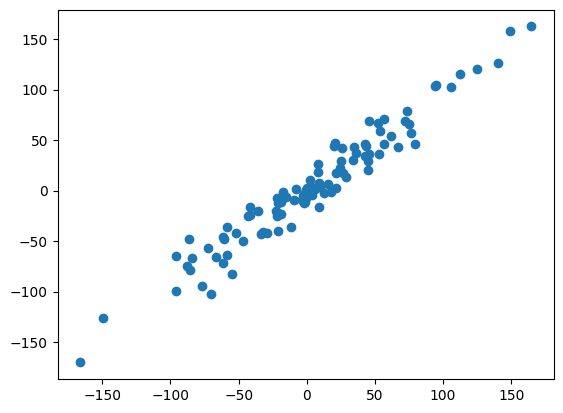

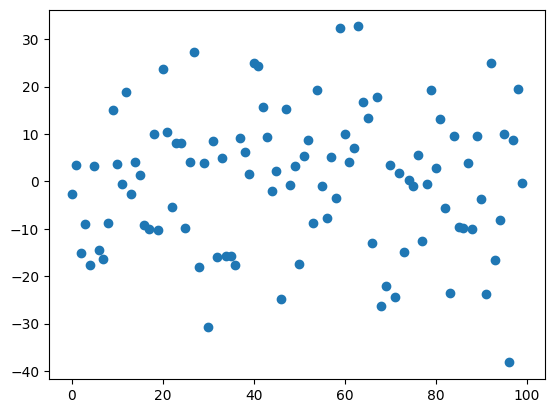

In [106]:
# if closer to 0, the prediction is better
# this measures how effict our prediction y is

plt.scatter(t, w*X+b)
plt.show()
# attempt to measure the error by calculating the difference from the test_value
# to the predicted value

error = np.transpose(t) - np.transpose(w*X+b)
plt.scatter(np.arange(0,100,1), error)

A much better method to analyse the result of the learning algorithm is to track the **mean squared error** (mse) after each epoch, i.e. the loss function which we actually want to minimize. The MSE is defined as:

$$\text{mse} = \frac{1}{N} \, \sum_{i=1}^N (t_i - y_i)^2$$

**Q:** Modify your LMS algorithm (either directly or copy it in the next cell) to track the mse after each epoch. After each epoch, append the mse on the training set to a list (initially empty) and plot it at the end. How does the mse evolve? Which value does it get in the end? Why? How many epochs do you actually need?

56.45011171767413
-2.119494368660031
[18.8772589808543, 14.548300441238789, 11.204297119867135, 8.622507251159828, 6.630314142732242, 5.093992145386293, 3.909981658007457, 2.9981144765394214, 2.296354873832605, 1.7567183826767616, 1.3421054267076462, 1.0238454403863861, 0.7797926310901716, 0.5928499392653128, 0.4498252866993619, 0.3405456130075454, 0.2571708451067297, 0.1936628816907869, 0.14537472812008795, 0.10873272776128363, 0.08099090256742006, 0.06004112677528215, 0.044266515025801506, 0.03242824489366051, 0.02357823642640035, 0.016991819879992664, 0.012115847811564119, 0.008528734863755105, 0.005909704627145362, 0.004015139695399549, 0.0026604086613279164, 0.0017059135772287245, 0.0010463875671394012, 0.0006026936493410301, 0.00031554700382767294, 0.0001407152248461534, 4.535331296654076e-05, 5.209090142967321e-06, 2.4956385208018148e-06, 2.427435444759167e-05, 6.122843657263022e-05, 0.00010673453969629972, 0.00015616181883050816, 0.00020634412620892096, 0.00025518384073005656, 

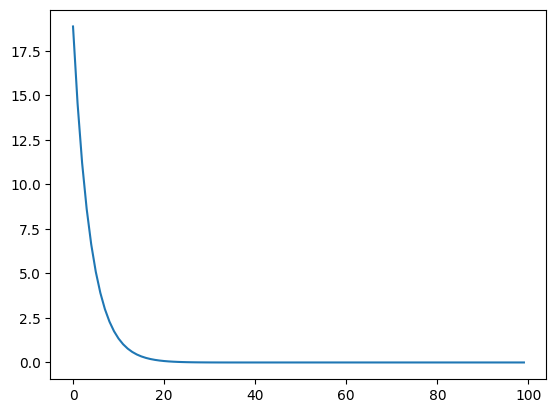

In [96]:
N_epochs = 100
eta = 0.1
mse_list = []

w = 0
b = 0

for i in range(N_epochs):
  dw = 0
  db = 0
  for j in range(len(t)):
    y_i = w*X[j][0] + b
    dw = dw + (t[j]- y_i)*X[j][0]
    db = db + (t[j]- y_i)
  w = w + eta*1/N*dw
  b = b + eta*1/N*db
  mse_list.append(1/N*np.sum((t[j]-y_i)*(t[j]-y_i)))
print(w)
print(b)
print(mse_list)
plt.plot(mse_list)


Let's now study the influence of the learning rate `eta=0.1` seemed to work, but is it the best value?

**Q:** Iterate over multiple values of `eta` using a logarithmic scale and plot the final mse after 100 epochs as a function of the learning rate. Conclude.

*Hint:* the logarithmic scale means that you will try values such as $10^{-5}$, $10^{-4}$, $10^{-3}$, etc. until 1.0. In Python, you can either write explictly 0.0001 or use the notation `1e-4`. For the plot, use `np.log10(eta)` to only display the exponent on the X-axis.

18.42622165261244
14.8166778168491
1.602001168840109
0.0006098043564427114


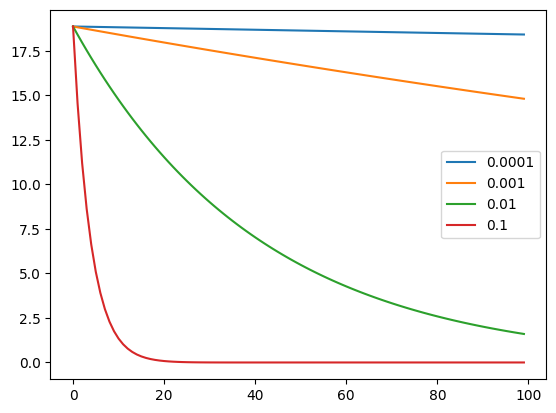

In [113]:
eta_list=[1e-4, 1e-3, 1e-2, 1e-1]

for eta in eta_list:
  N_epochs = 100
  mse_list = []

  w = 0
  b = 0

  for i in range(N_epochs):
    dw = 0
    db = 0
    for j in range(len(t)):
      y_i = w*X[j][0] + b
      dw = dw + (t[j]- y_i)*X[j][0]
      db = db + (t[j]- y_i)
    w = w + eta*1/N*dw
    b = b + eta*1/N*db
    mse_list.append(1/N*np.sum((t[j]-y_i)*(t[j]-y_i)))
  # print(w)
  # print(b)
  plt.plot(mse_list)
  print(mse_list[len(mse_list) - 1])
plt.legend(eta_list)
plt.show()



## Scikit-learn

The code that you have written is functional, but extremely slow, as you use for loops in Python. For so little data samples, it does not make a difference, but if you had millions of samples, this would start to be a problem.

The solution is to use optimized implementations of the algorithms, running in C++ or FORTRAN under the hood. We will use here the LMS algorithm provided by `scikit-learn` as you have already installed it and it is very simple to use. Note that one could use tensorflow too, but that would be killing a fly with a sledgehammer.

`scikit-learn` provides a `LinearRegression` object that implements LMS. The documentation is at: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>.

You simply import it with:

```python
from sklearn.linear_model import LinearRegression
```

You create the object with:

```python
reg = LinearRegression()
```

`reg` is now an object with different methods (`fit()`, `predict()`) that accept any kind of data and performs linear regression.

To train the model on the data $(X, t)$, simply use:

```python
reg.fit(X, t)
```

The parameters of the model are obtained with `reg.coef_` for $w$ and `reg.intercept_` for $b$.

You can predict outputs for new inputs using:

```python
y = reg.predict(X)
```

**Q:** Apply linear regression on the data using `scikit-learn`. Check the model parameters after learning and compare them to what you obtained previously. Print the mse and make a plot comparing the predictions with the data.

[56.4515895]
-2.1211738309411965
0.0006098043564427114


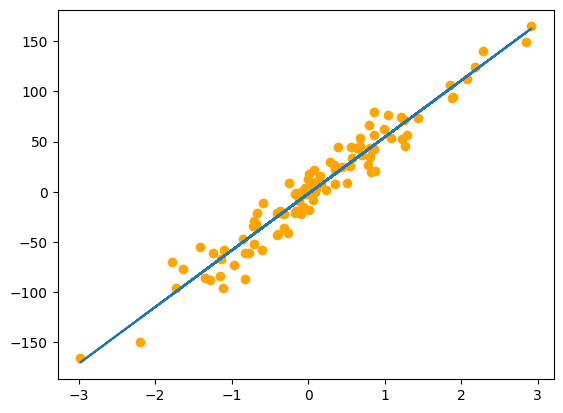

In [114]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, t)
y = reg.predict(X)

print(reg.coef_)
print(reg.intercept_)
# mse
print(1/N*np.sum((t[j]-y_i)*(t[j]-y_i)))

plt.plot(X, y)
plt.scatter(X, t, c='orange')

## Delta learning rule

Let's now implement the online version of LMS, the **delta learning rule**. The only difference is that the parameter updates are applied immediately after each example is evaluated, not at the end of training.

* $w=0 \quad;\quad b=0$

* **for** M epochs:

    * **for** each sample $(x_i, t_i)$:

        * $y_i = w \, x_i + b$

        * $\Delta w = \eta \, (t_i - y_i ) \, x_i$

        * $\Delta b = \eta \, (t_i - y_i)$
        
**Q:** Implement the delta learning rule for the regression problem with `eta = 0.1`. Plot the evolution of the mse and compare it to LMS.

1.5848427177835092
0.0008038850149831822
0.0035725882811943424
0.2784957667798761


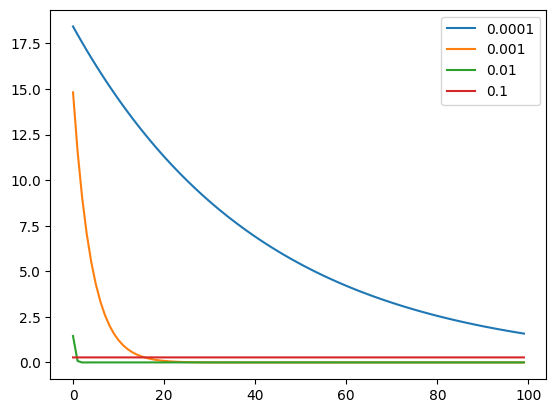

In [115]:
eta_list=[1e-4, 1e-3, 1e-2, 1e-1]

for eta in eta_list:
  N_epochs = 100
  mse_list = []

  w = 0
  b = 0

  for i in range(N_epochs):
    for j in range(len(t)):
      y_i = w*X[j][0] + b
      w = w + eta*(t[j]-y_i)*X[j][0]
      b = b + eta*(t[j]-y_i)
    mse_list.append(1/N*np.sum((t[j]-y_i)*(t[j]-y_i)))
  # print(w)
  # print(b)
  plt.plot(mse_list)
  print(mse_list[len(mse_list) - 1])
plt.legend(eta_list)
plt.show()



**Q:** Vary the learning rate logarithmically as for LMS and conclude.

In [ ]:
# converges faster
# result at 0.01 is better than result at 0.1